### Data Science and Business Analytics Intern at SPARKS Foundation

#### Prediction using Supervised Machine Learning

#### Author : Payal Gupta

#### PROBLEM : Predict the percentage of a student based on the number of study hours.

### Importing and Reading the dataset

In [23]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Reading Data from remote link
data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data Imported Successfully")
data.head(10) #prints top 10 rows of dataset

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
data.shape

(25, 2)

#### The dataset contains 25 rows and 2 columns, i.e., Hours and scores

In [26]:
data.describe() #describes the dataset using statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
data.info() #Prints a summary of columns count and its dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualisation of Data using Scatter plot 

##### Let's plot our data points on 2-D graph and see if we can manually find any relationship between the data. 

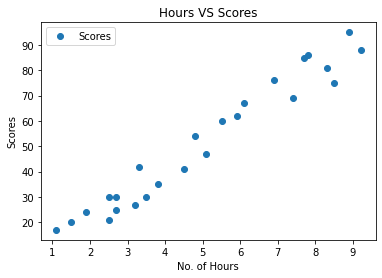

In [30]:
#plotting the scores against number of hours
data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours VS Scores")
plt.xlabel("No. of Hours")
plt.ylabel("Scores")
plt.show()


#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [31]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### We can say that both the variables are positively correlated to one another and a linear regression exists between them. 

### Splitting the Dataset 

In [32]:
x=data.iloc[:, :-1].values #gives second last column of dataset
y=data.iloc[:,1].values #gives last column of dataset

### Splitting dataset into training and test sets

#### We'll do this by using Scikit-Learn's built-in train_test_split() method: 

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Training the Algorithm 

In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Score: ",regressor.score(x_train,y_train))
print("Training Complete.")

Score:  0.9515510725211552
Training Complete


### Plotting the Regression Line 

In [39]:
#evaluating coefficient and intercept
m=regressor.coef_
c=regressor.intercept_
print("Coefficient: ",m)
print("Intercept: ",c)

Coefficient:  [9.91065648]
Intercept:  2.018160041434662


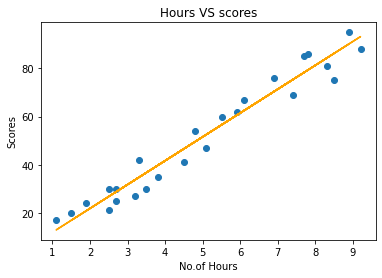

In [43]:
#plotting the regression line
line=m*x+c

#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,"orange")
plt.title("Hours VS scores")
plt.xlabel("No.of Hours")
plt.ylabel("Scores")
plt.show()

### Making Predictions

In [44]:
print("Testing dataset - in hours\n",x_test) #testing data in hours

Testing dataset - in hours
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [45]:
y_pred=regressor.predict(x_test) #predicting the scores
print("Predicted y:\n",y_pred)

Predicted y:
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Comparing Actual VS Predicted values

In [49]:
data =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting the score for 9.25 hours/day

In [54]:
#you can also test your own data
hours=9.25
own_pred=regressor.predict([[hours],])
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of hours = 9.25
Predicted Score = 93.69173248737539


#### If a student studies 9.25 hrs/day, Linear Regression Model prediction says that the student will score 93.69%

### Evaluating the Model

#### As we are dealing with numeric data, Mean absolute error, Mean squared error would be a great choice for a metric for evaluating the Linear Regression Model.

In [56]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456


In [57]:
accuracy=regressor.score(x_test,y_test)
print("Accuracy :",accuracy*100,"%")

Accuracy : 94.54906892105353 %
